Bank Marketing Campaign Predictive Analytics
This project contains a machine learning model for predicting the success of a bank marketing campaign. The model uses historical data on customer demographics, banking history, and campaign results to identify the factors that contribute to successful marketing outcomes.

Data
The dataset used for this project contains over 45,000 records of customer data, including demographic information, banking history, and previous campaign results. The dataset was preprocessed to remove irrelevant information and handle missing values.

Methodology
The model uses a combination of feature engineering, data visualization, and machine learning techniques to identify the factors that contribute to successful marketing outcomes. The model was trained on a subset of the data using various algorithms such as Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier. The model achieved an accuracy score of 90% in predicting the success of the bank marketing campaign.

Usage
To use the model, input the customer information, such as age, education, job type, and previous campaign results, into the prediction function. The model will output a probability score indicating the likelihood of a successful marketing outcome.

Dependencies
This project was implemented using Python 3 and the following libraries:

Pandas
Numpy
Matplotlib
Seaborn
Scikit-learn
XGBoost

In [25]:
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
bank=pd.read_csv("bank-additional-full.csv",sep=';')
bank_copy=bank.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(bank_copy.shape))
print (bank_copy.info())

The shape of the  data is (row, column):(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 no

In [6]:
bank_copy.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [7]:
bank_copy.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
bank_copy.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [8]:
#Checking out the categories and their respective counts in each feature
print("Job:",bank_copy.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_copy.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

<AxesSubplot:>

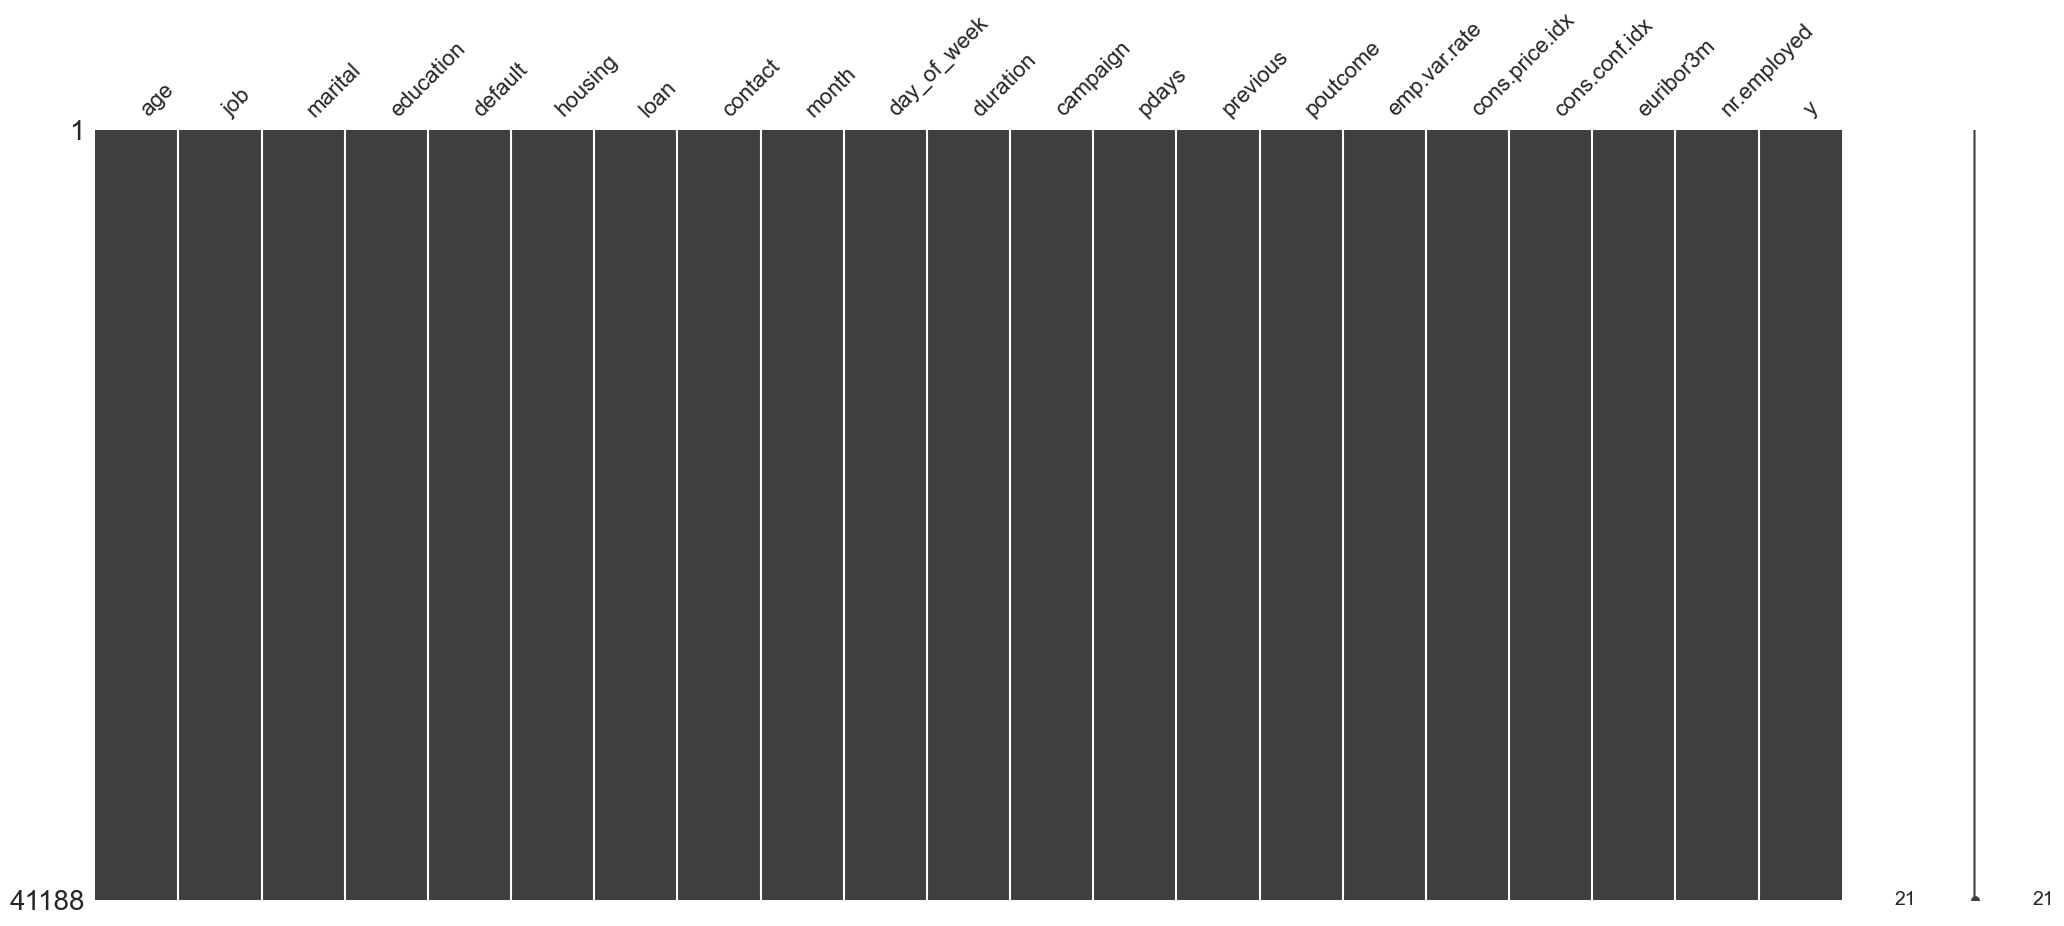

In [9]:
import missingno as msno 
msno.matrix(bank_copy)

In [10]:
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [11]:
import plotly.express as px

fig = px.box(bank_copy, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [14]:
bank_copy.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [12]:
import plotly.express as px

fig = px.box(bank_copy, x="campaign", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [13]:
fig = px.scatter(bank_copy, x="campaign", y="duration", color="y")
fig.show()

Attributes: Bank client data:

Age : Age of the lead (numeric)
Job : type of job (Categorical)
Marital : Marital status (Categorical)
Education : Educational Qualification of the lead (Categorical)
Default: Does the lead has any default(unpaid)credit (Categorical)
Housing: Does the lead has any housing loan? (Categorical)
loan: Does the lead has any personal loan? (Categorical)
Related with the last contact of the current campaign:

Contact: Contact communication type (Categorical)
Month: last contact month of year (Categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numeric).
Important note: Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric)
pdays: number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
previous: number of contacts performed before this campaign and for this client (numeric)
poutcome: outcome of the previous marketing campaign (categorical)
Social and economic context attributes

emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index - monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate - daily indicator (numeric)
nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes','no')

In [19]:
bank_copy.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

<AxesSubplot:xlabel='cons.price.idx', ylabel='Density'>

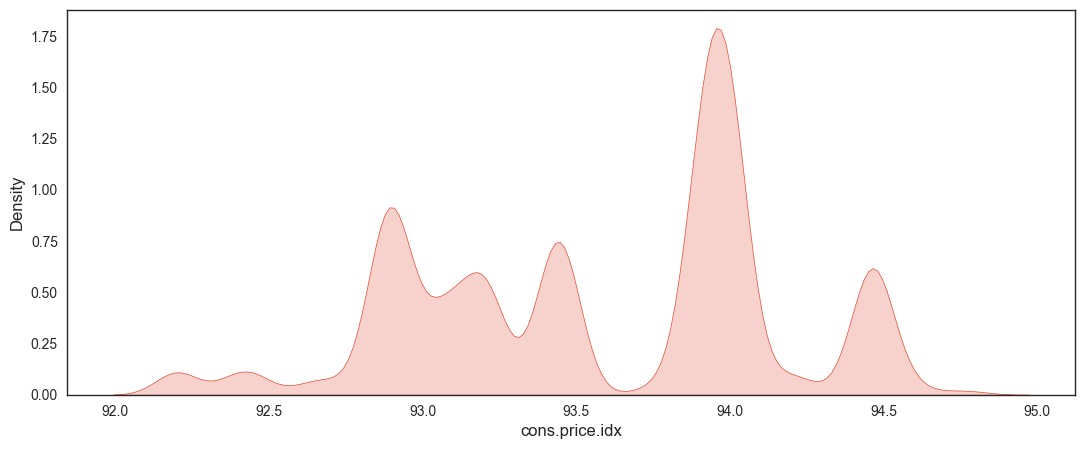

In [5]:
plt.figure(figsize=(13,5))

sns.kdeplot(bank_copy['cons.price.idx'], shade=  True)

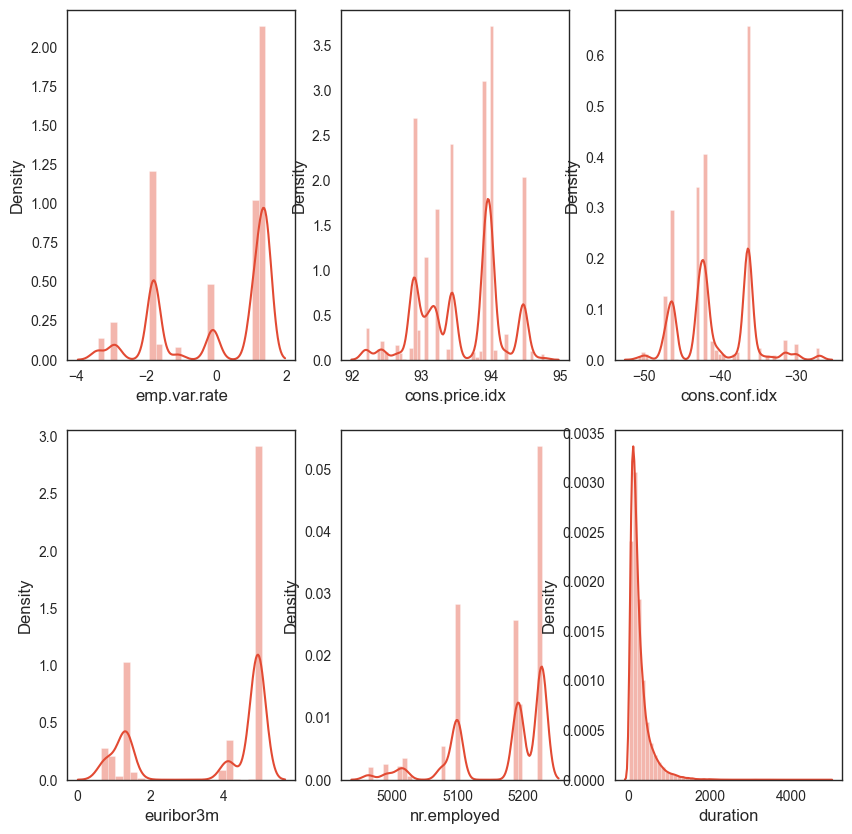

In [16]:
plt.subplot(231)
sns.distplot(bank_copy['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank_copy['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank_copy['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(bank_copy['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank_copy['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(bank_copy['duration'])
fig = plt.gcf()
fig.set_size_inches(10,10)

<AxesSubplot:xlabel='cons.price.idx', ylabel='marital'>

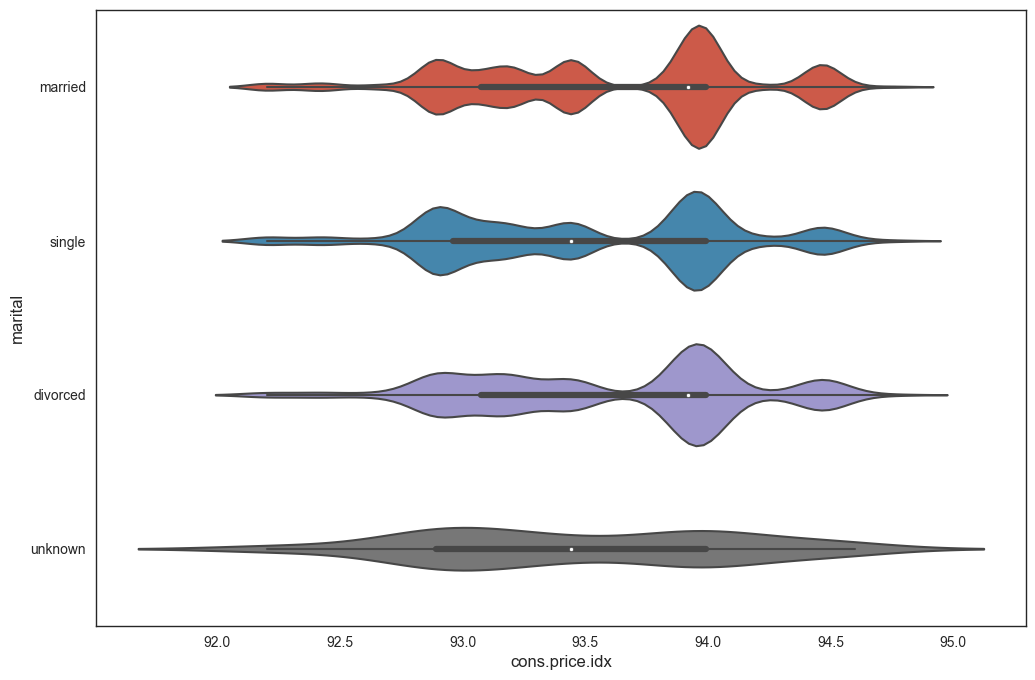

In [26]:
sns.violinplot( y=bank_copy["marital"], x=bank_copy["cons.price.idx"] )

<AxesSubplot:xlabel='education'>

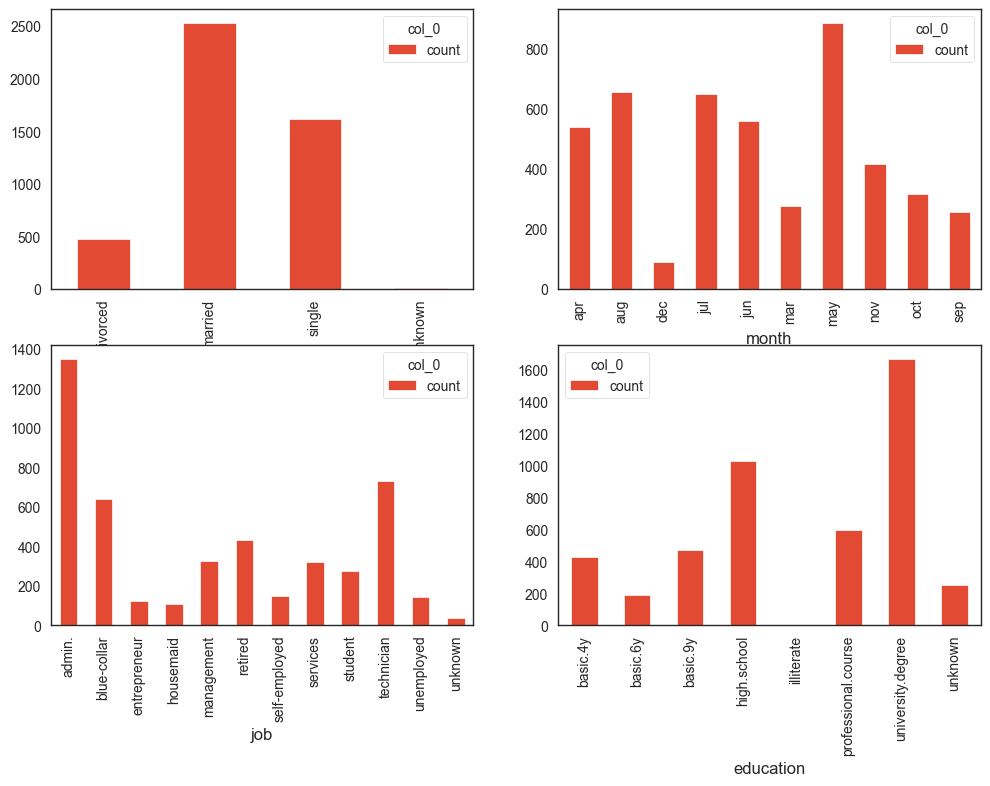

In [27]:
bank_yes = bank_copy[bank_copy['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])  

Correlation plot of attributes

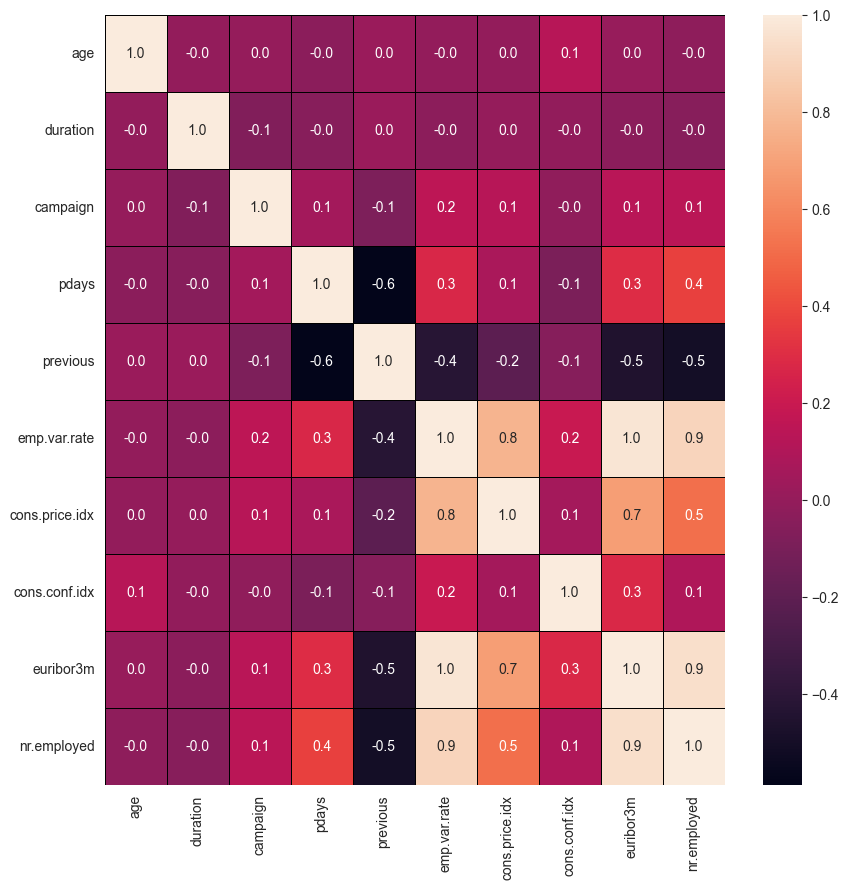

In [28]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_copy.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Handling outliers:
Let's check out our numerical feature outliers through boxplot

Text(0.5, 1.0, 'No of employees')

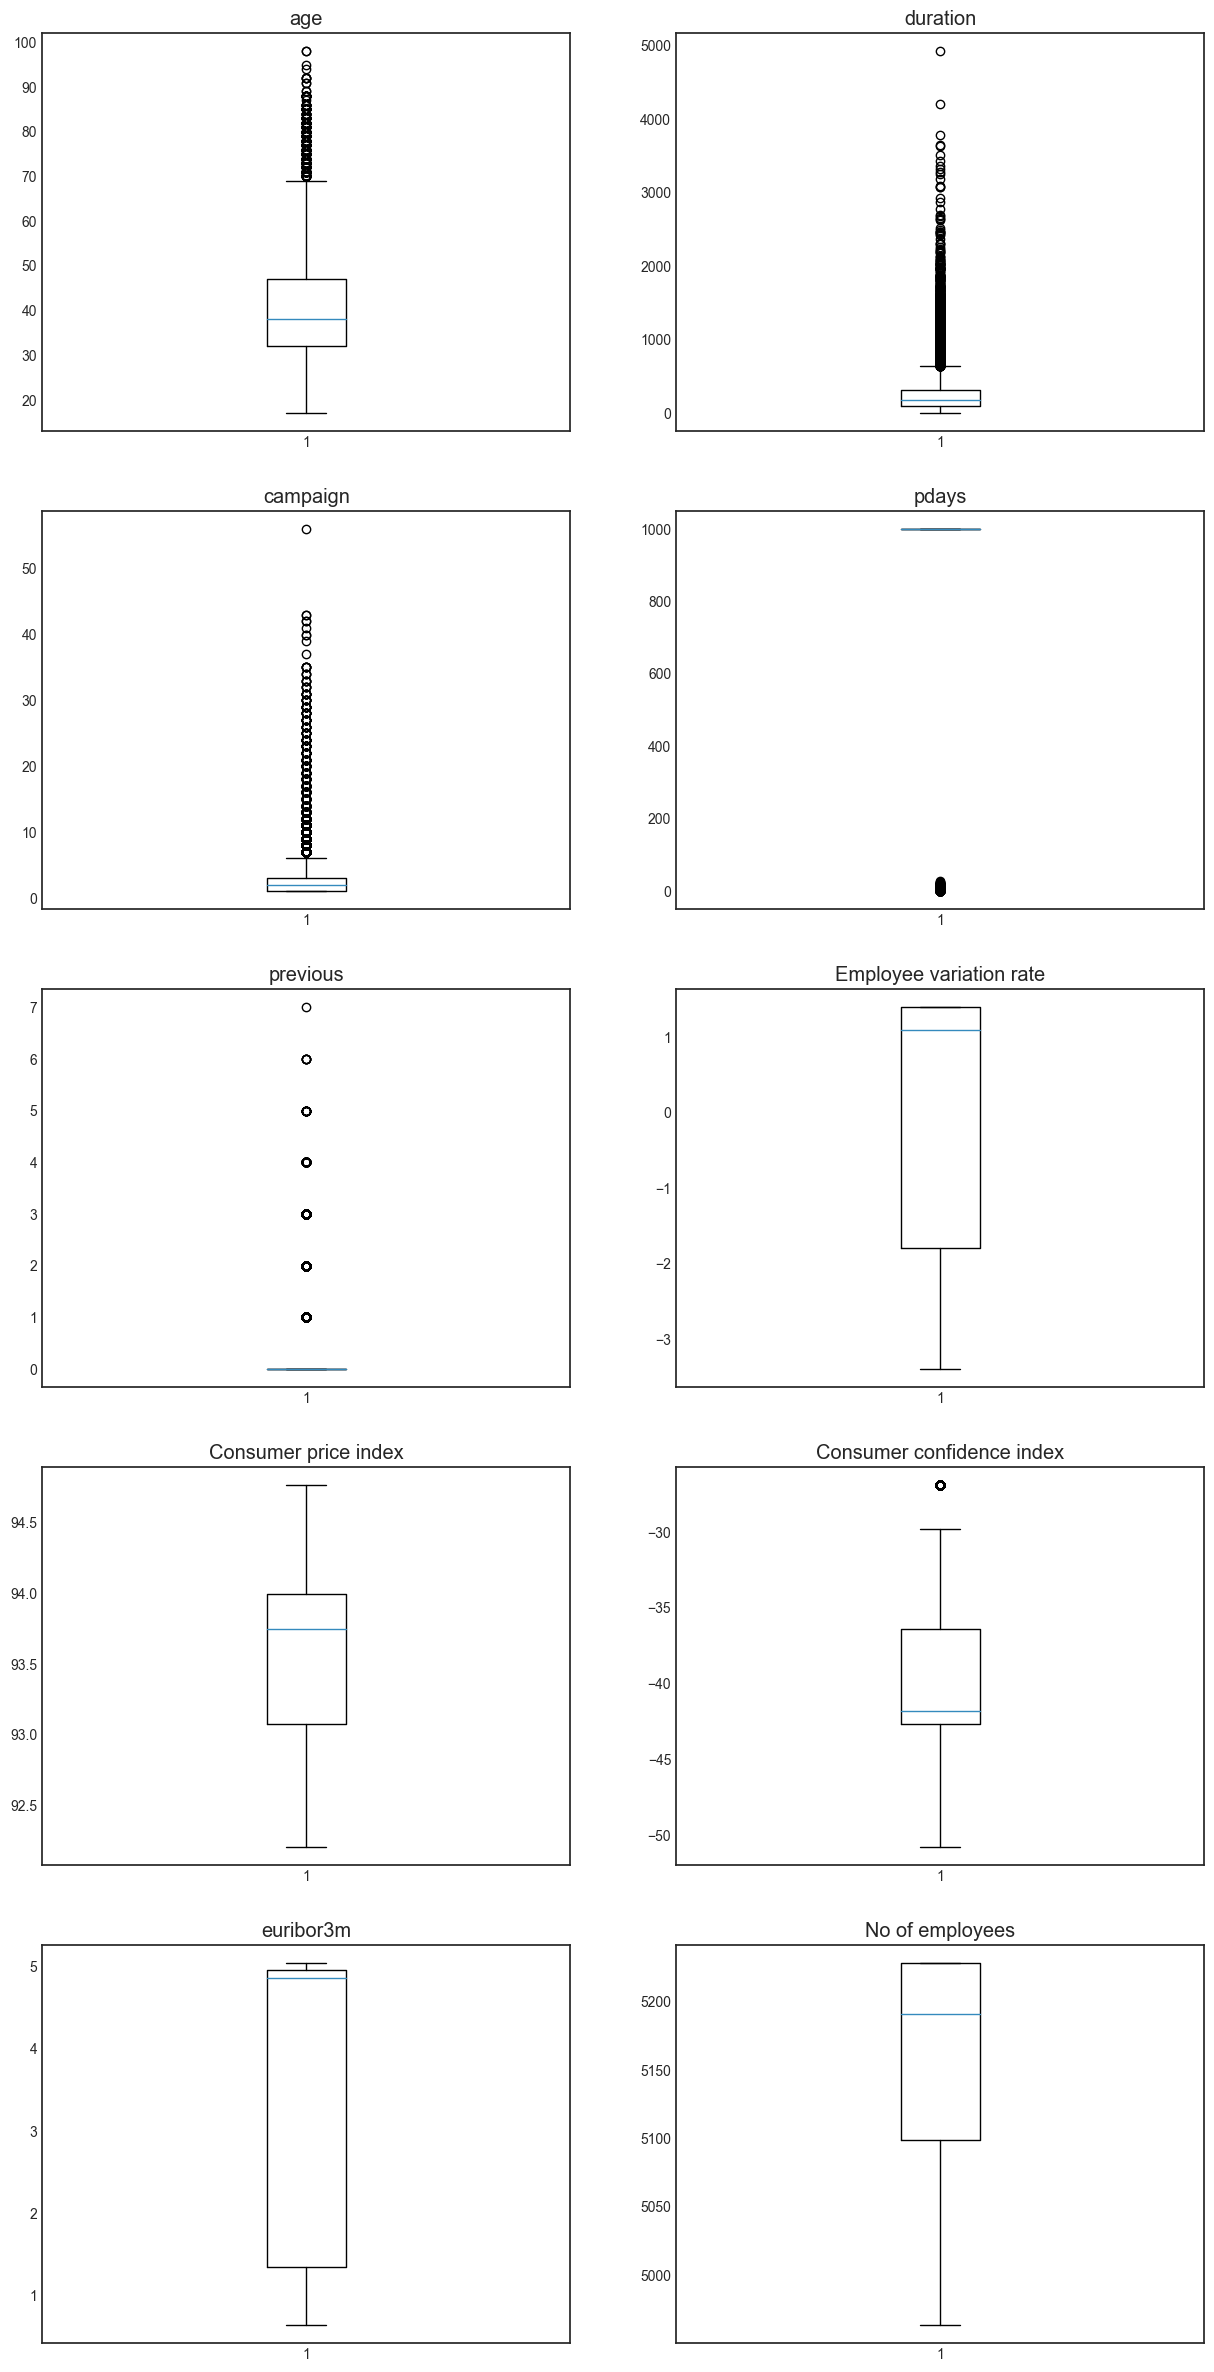

In [29]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [30]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

Text(0.5, 1.0, 'campaign')

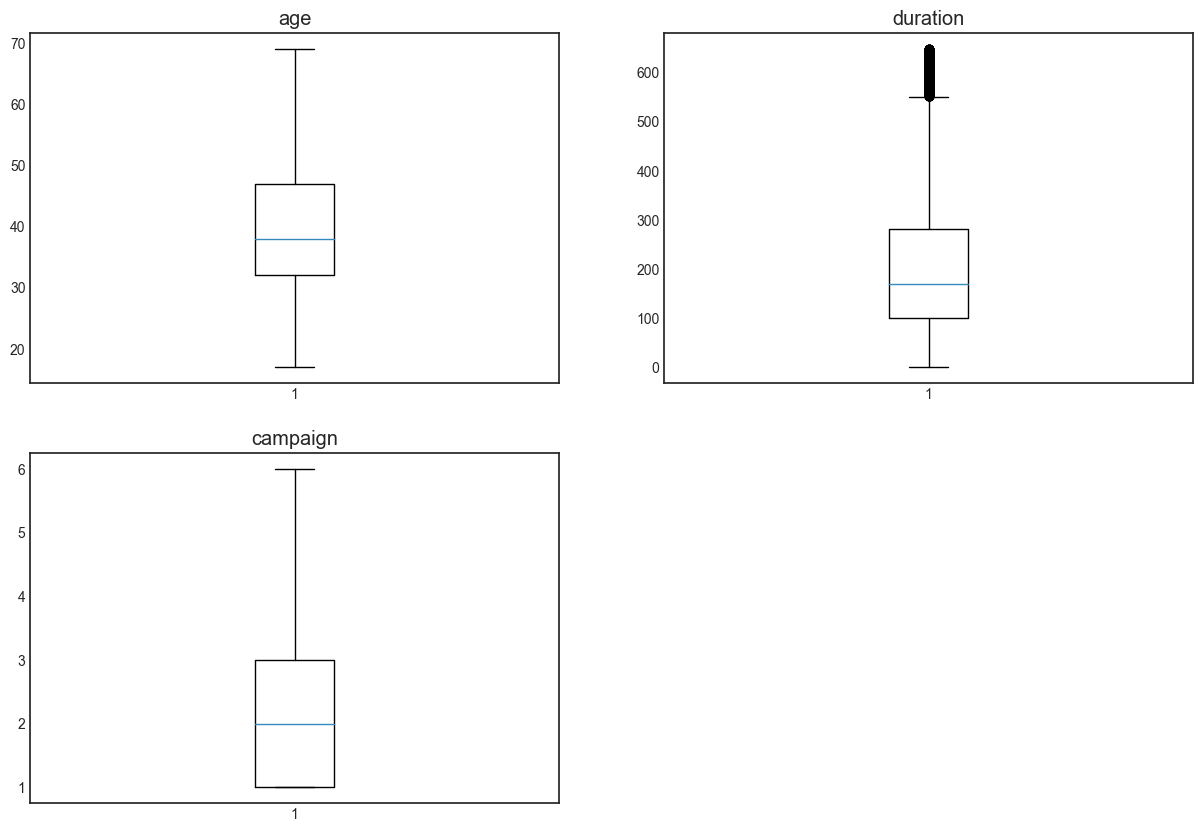

In [31]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

In [32]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

In [33]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict)

In [34]:
bank_features.loc[:, ['month', 'day_of_week']].head()

month  day_of_week
0      5            2
1      5            2
2      5            2
3      5            2
4      5            2

In [35]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [36]:
bank_features['pdays'].value_counts()

0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

In [37]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [39]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [40]:
bank_features.head()

age        job  marital      education  default  housing  loan    contact  \
0   56  housemaid  married  middle.school        0        0     0  telephone   
1   57   services  married    high.school       -1        0     0  telephone   
2   37   services  married    high.school        0        1     0  telephone   
3   40     admin.  married  middle.school        0        0     0  telephone   
4   56   services  married    high.school        0        0     1  telephone   

   month  day_of_week  duration  campaign  pdays  previous     poutcome  \
0      5            2       261         1      0         0  nonexistent   
1      5            2       149         1      0         0  nonexistent   
2      5            2       226         1      0         0  nonexistent   
3      5            2       151         1      0         0  nonexistent   
4      5            2       307         1      0         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0           1.1          93.994          -36.4      4.857       5191.0  0  
1           1.1          93.994          -36.4      4.857       5191.0  0  
2           1.1          93.994          -36.4      4.857       5191.0  0  
3           1.1          93.994          -36.4      4.857       5191.0  0  
4           1.1          93.994          -36.4      4.857       5191.0  0

In [41]:
bank_features.loc[:,['housing','default','loan','y']].head()

housing  default  loan  y
0        0        0     0  0
1        0       -1     0  0
2        1        0     0  0
3        0        0     0  0
4        0        0     1  0

In [42]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [43]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

dummy_telephone  dummy_nonexistent  dummy_success
0                1                  1              0
1                1                  1              0
2                1                  1              0
3                1                  1              0
4                1                  1              0

Frequency encoding: 
Let's use frequency encoding with job and education features in our dataset

In [44]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [45]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [46]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [47]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [48]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [49]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

Standardization of numerical variables

In [50]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [51]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

job  education  default  housing  loan  month  day_of_week  y  \
0   899      10688        0        0     0      5            2  0   
1  3456       8287       -1        0     0      5            2  0   
2  3456       8287        0        1     0      5            2  0   
3  9110      10688        0        0     0      5            2  0   
4  3456       8287        0        0     1      5            2  0   

   dummy_telephone  dummy_nonexistent  dummy_success  marital_ordinal  \
0                1                  1              0                1   
1                1                  1              0                1   
2                1                  1              0                1   
3                1                  1              0                1   
4                1                  1              0                1   

        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.694643  0.383434 -0.813061 -0.161001 -0.354645      0.660543   
1  1.797965 -0.413575 -0.813061 -0.161001 -0.354645      0.660543   
2 -0.268482  0.134369 -0.813061 -0.161001 -0.354645      0.660543   
3  0.041485 -0.399342 -0.813061 -0.161001 -0.354645      0.660543   
4  1.694643  0.710777 -0.813061 -0.161001 -0.354645      0.660543   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.741263       0.891988    0.72072     0.340002  
1        0.741263       0.891988    0.72072     0.340002  
2        0.741263       0.891988    0.72072     0.340002  
3        0.741263       0.891988    0.72072     0.340002  
4        0.741263       0.891988    0.72072     0.340002

In [52]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

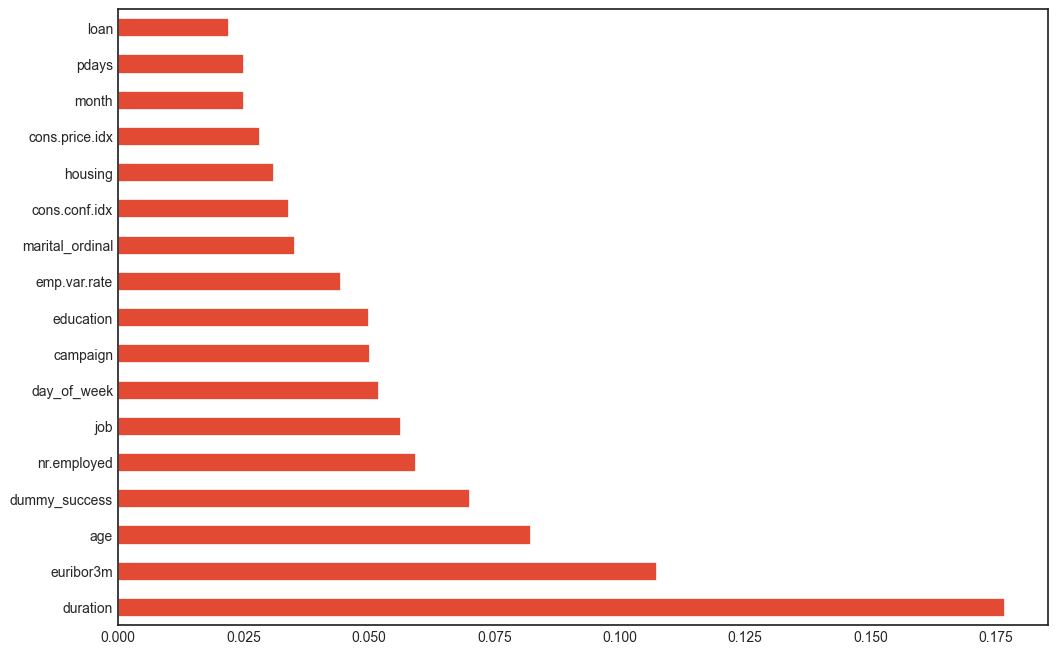

In [53]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [54]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


Modelling our Data

In [55]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8781518911204416
Decision Tree Test Accuracy: 0.6388661610228156
KNN Test Accuracy: 0.8746929484882704
SVC Test Accuracy: 0.9188718011316903
Naive Bayes Test Accuracy: 0.8191811374646486


In [56]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.18420699693267145, random_state=0)
The mean accuracy of the model is: 0.9246450161675804


In [57]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


confusion matrix 

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6399  139]
 [ 397  178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6538
           1       0.56      0.31      0.40       575

    accuracy                           0.92      7113
   macro avg       0.75      0.64      0.68      7113
weighted avg       0.91      0.92      0.91      7113



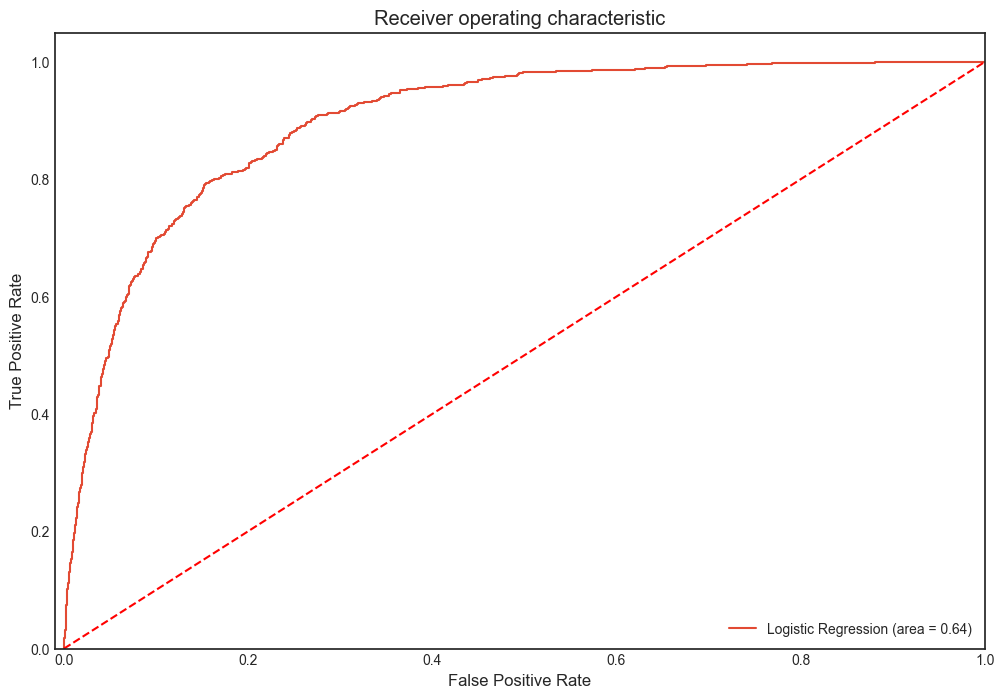

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()